In [1]:
import numpy as np # use to handle intigers
import pandas as pd # useful for importing dataframe 
import seaborn as sns # Visualization 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller # used to check stationarity
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # ACF and PACF Plots
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

import os
for dirname, _, filenames in os.walk('../input/analyzing-and-prediction-of-bitcoin-pricing'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/analyzing-and-prediction-of-bitcoin-pricing/BTC-USD.csv


In [2]:
df = pd.read_csv('/kaggle/input/analyzing-and-prediction-of-bitcoin-pricing/BTC-USD.csv', index_col='Date', parse_dates=True)

In [3]:
print(df.head())
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  
                    Open          High           Low         Close  \
Date                                                                 
2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469   
2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063   
2022-03-31  47062.148438  47512.027344  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2755 entries, 2014-09-17 to 2022-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2755 non-null   float64
 1   High       2755 non-null   float64
 2   Low        2755 non-null   float64
 3   Close      2755 non-null   float64
 4   Adj Close  2755 non-null   float64
 5   Volume     2755 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.7 KB


<AxesSubplot:xlabel='Date'>

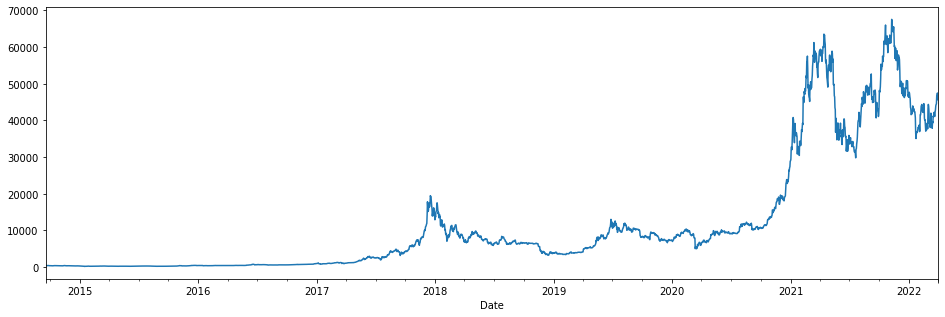

In [5]:
df['Open'].plot(figsize=(16,5)) #line plot of Open price 

<AxesSubplot:xlabel='Date'>

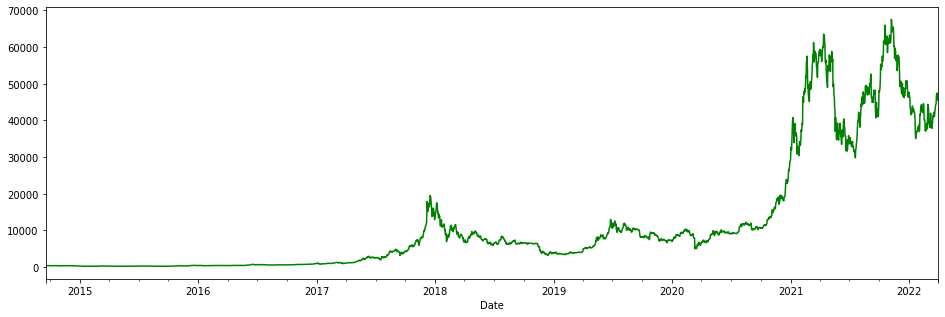

In [6]:
df['Close'].plot(figsize=(16,5), color = 'g') # line plot of Closed price

<AxesSubplot:xlabel='Date'>

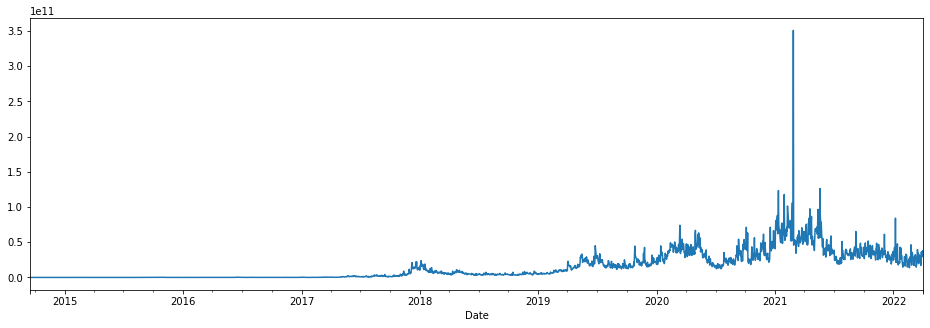

In [7]:
df['Volume'].plot(figsize=(16,5)) # line plot of volume 

<AxesSubplot:ylabel='Frequency'>

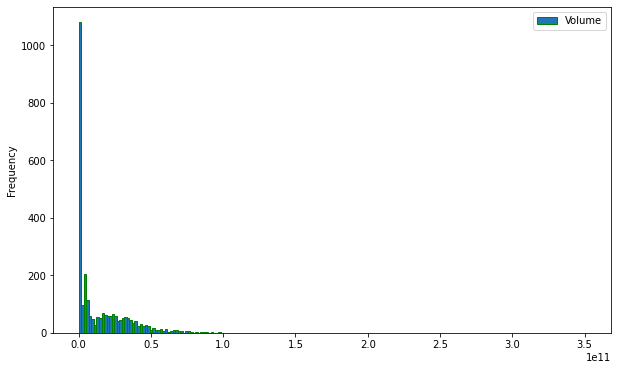

In [8]:
df.plot.hist(y='Volume', figsize=(10,6),bins=200,edgecolor='g') # histogram 

In [9]:
!pip install mplfinance 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 KB 278.2 kB/s eta 0:00:00


In [10]:
import mplfinance as mpf

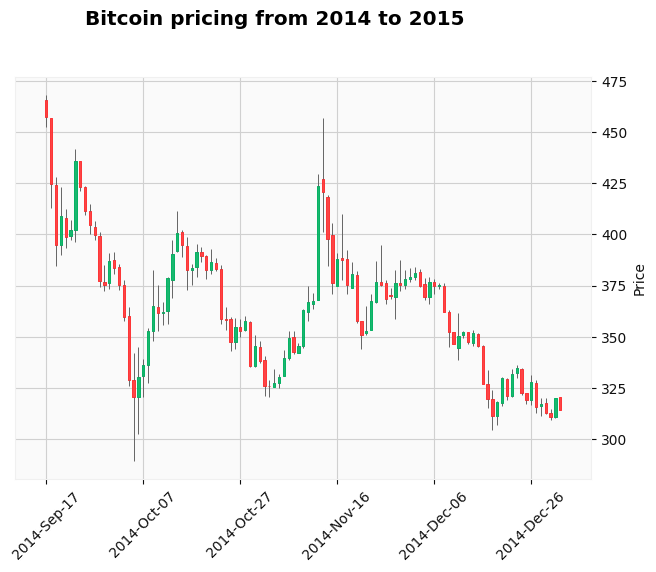

In [11]:
mpf.plot(df['2014-09-17' : '2015-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2014 to 2015')

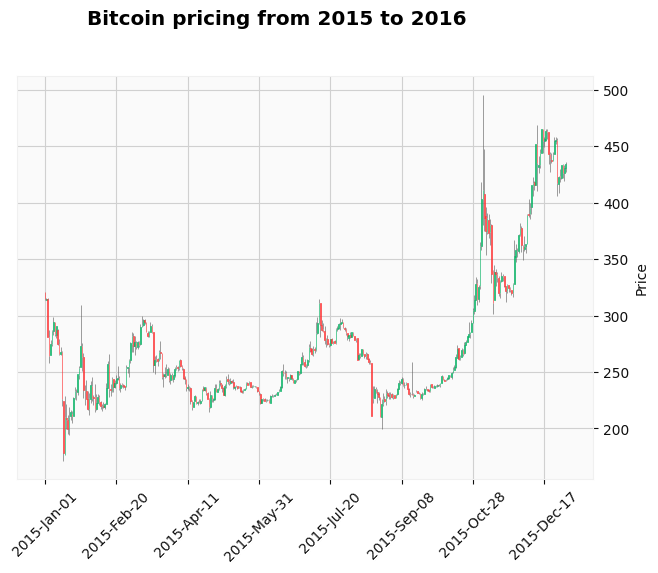

In [12]:
mpf.plot(df['2015-01-01' : '2016-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2015 to 2016')

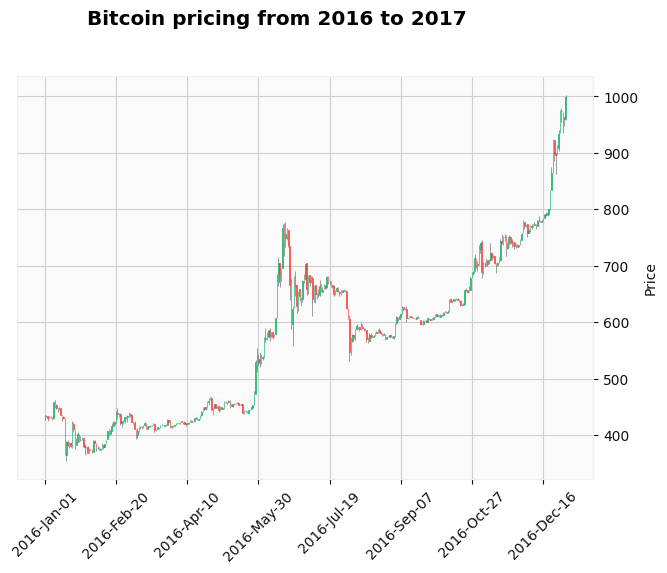

In [13]:
mpf.plot(df['2016-01-01' : '2017-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2016 to 2017')

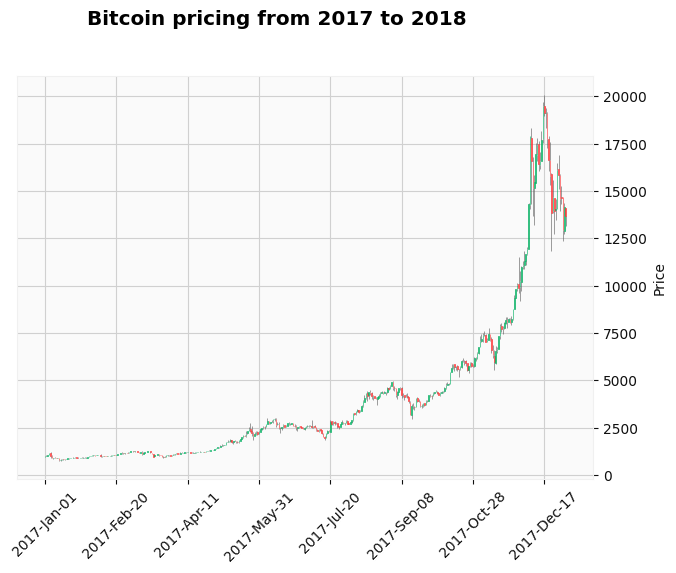

In [14]:
mpf.plot(df['2017-01-01' : '2018-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2017 to 2018')

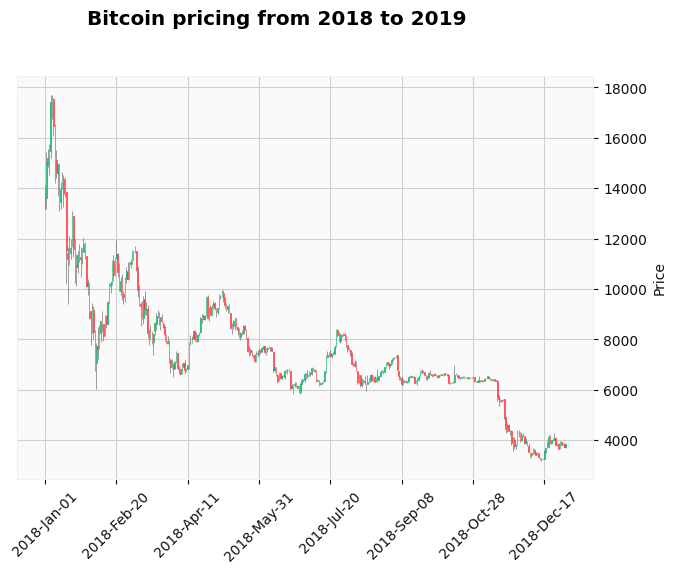

In [15]:
mpf.plot(df['2018-01-01' : '2019-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2018 to 2019')

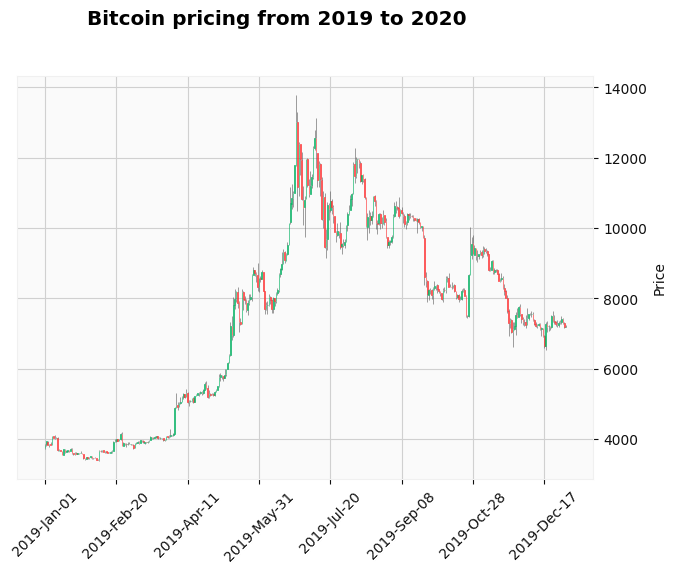

In [16]:
mpf.plot(df['2019-01-01' : '2020-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2019 to 2020')

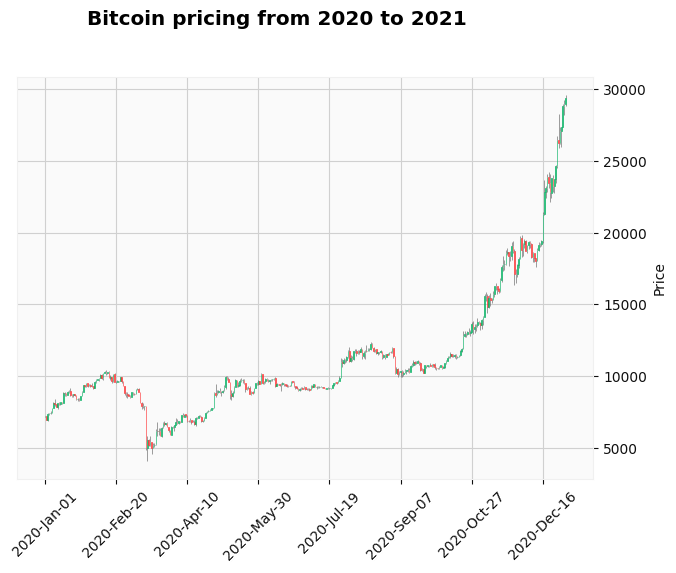

In [17]:
mpf.plot(df['2020-01-01' : '2021-01-01'],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2020 to 2021')

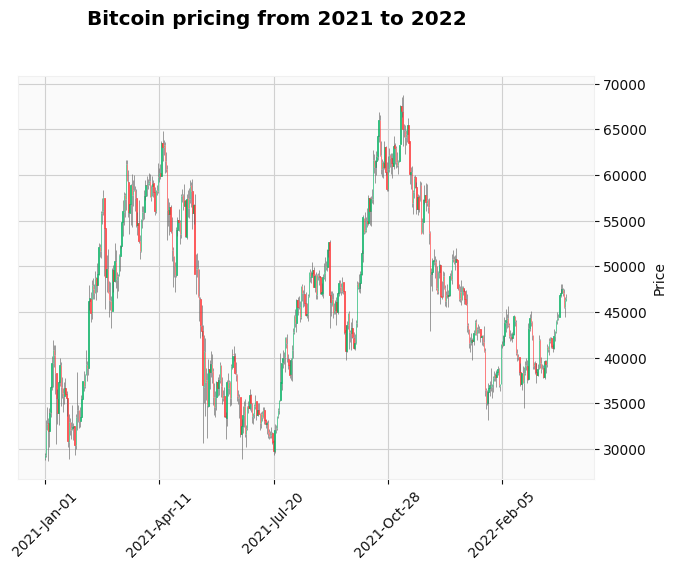

In [18]:
mpf.plot(df['2021-01-01' : '2022-04-02 '],
         type = 'candle',style='yahoo',
         title=' Bitcoin pricing from 2021 to 2022')

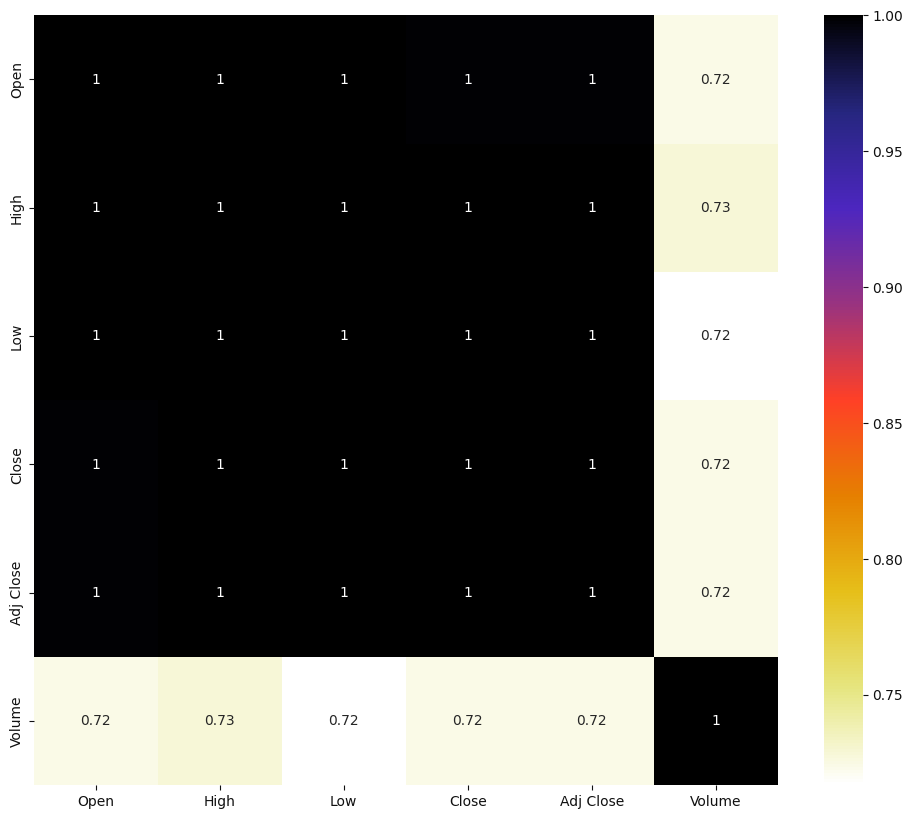

In [19]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [20]:
A = df["Close"].values
result = adfuller(A)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-stationary")

ADF Statistic: -0.842730
p-value: 0.806247
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Failed to Reject Ho - Time Series is Non-stationary


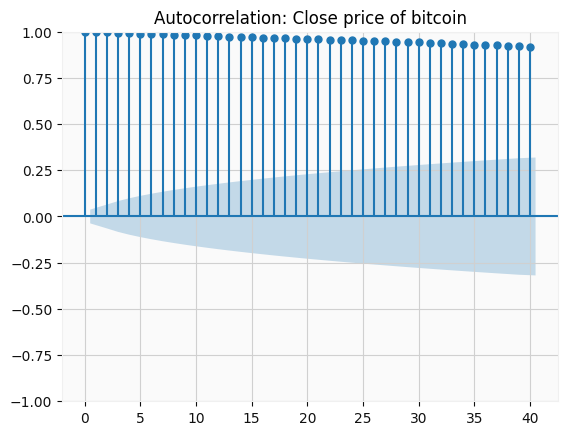

In [21]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Close price of bitcoin'
lags = 40
plot_acf(df['Close'],title=title,lags=lags);

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


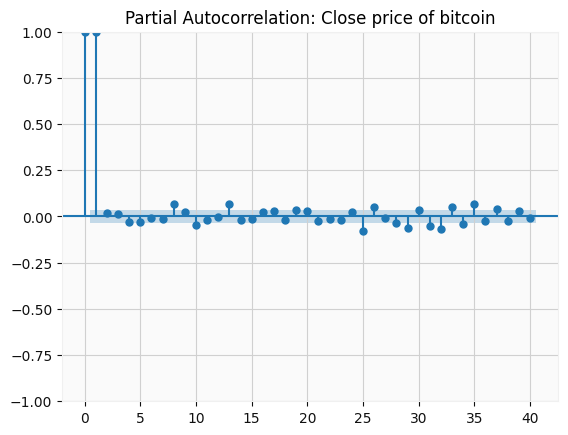

In [22]:
title='Partial Autocorrelation: Close price of bitcoin'
lags=40
plot_pacf(df['Close'],title=title,lags=lags);

Below are some observations from the plots.

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as: the Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters, p and q respectively p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2, The PACF shows a significant lag on day 2

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=18, since the ACF shows a significant lag for 18th day.

The PACF perhaps has some significant lag at 7th, 8th, 12th, 15th day and so on, which also suggests that there is still some seasonality present in the differenced data. We will try different orders of ARIMA models to identify the best order by deriving the residual sum of squares(RSS) for each model. Lower RSS are considered to be the best ones

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df['Close'],order=(1,0,1),seasonal_order=(1, 0, 0, 12))
result=model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49981D+02    |proj g|=  6.99122D+02

At iterate    5    f=  9.63381D+00    |proj g|=  2.44860D+00

At iterate   10    f=  8.53700D+00    |proj g|=  1.19297D-01

At iterate   15    f=  8.14354D+00    |proj g|=  6.20465D-02

At iterate   20    f=  8.09517D+00    |proj g|=  3.33191D-02

At iterate   25    f=  8.08960D+00    |proj g|=  3.92156D-03

At iterate   30    f=  8.08923D+00    |proj g|=  2.11287D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<AxesSubplot:ylabel='Density'>

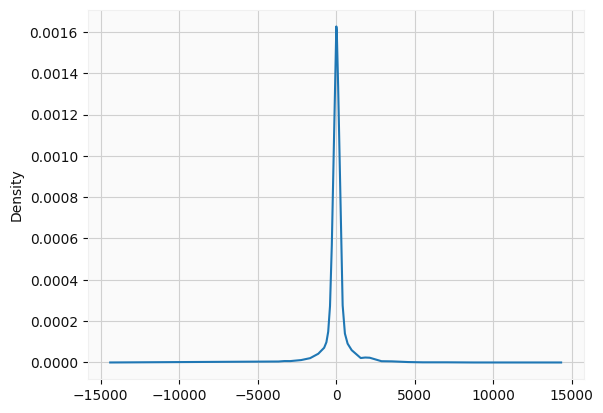

In [24]:
result.resid.plot(kind='kde')

In [25]:
from pandas.tseries.offsets import DateOffset
new_dates=[df.index[-1]+DateOffset(months=x) for x in range(1,365)]
df_pred=pd.DataFrame(index=new_dates,columns =df.columns)
df_pred.head()

,Open,High,Low,Close,Adj Close,Volume
2022-05-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-02,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-02,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

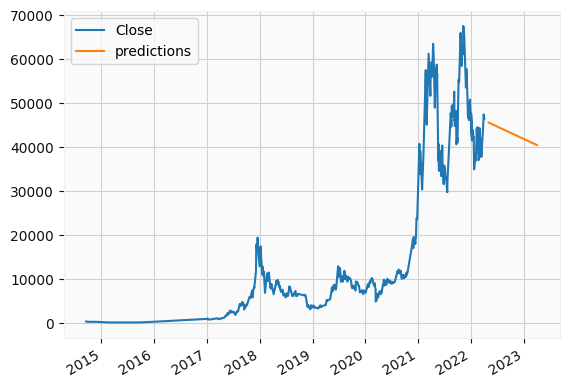

In [26]:
df2=pd.concat([df,df_pred])
 
 
df2['predictions']=result.predict(start=2755,end=3120)
df2[['Close','predictions']].plot()